In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [341]:
df1 = pd.read_csv("../Web-Scraping-Stats/cleaned_stats_data/player_stats_combined.csv", index_col=False)
df1.rename(columns={'X3P':'ThreeP', 'X3PA': 'ThreeP_Attempted', 'X3P.': 'ThreeP_Percentage', 'FG.': 'FG_Percentage', 'FT.': 'FT_Percentage'}, inplace=True)

df2 = pd.read_csv("../Web-Scraping-Player-Details/cleaned_player_details_data/combined_dataset.csv", index_col=False)
df2 = df2.drop(['Height_Feet', 'Height_Inch'], axis=1)
df2['NBA_Draft_Year'] = pd.to_numeric(df2['NBA_Draft_Year'], errors='coerce')
df2['NBA_Draft_Round'] = pd.to_numeric(df2['NBA_Draft_Round'], errors='coerce')
df2['NBA_Draft_Pick'] = pd.to_numeric(df2['NBA_Draft_Pick'], errors='coerce')

/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

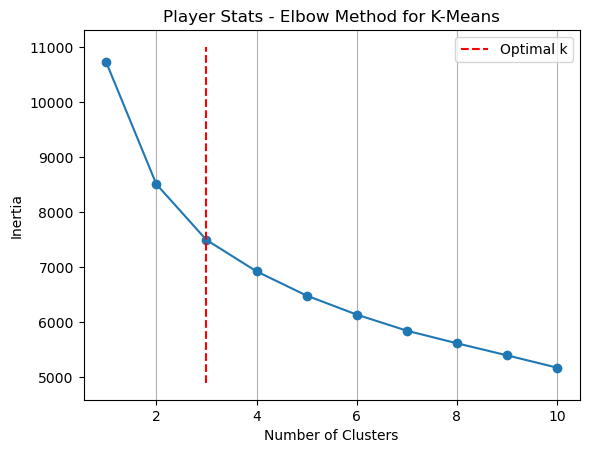

In [342]:
# Player Stats - Elbow method
X_numeric = df1.select_dtypes(include=['int64']).dropna() #not including float cols b/c missing values
X_numeric = X_numeric.drop('Year', axis=1)
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_numeric_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Player Stats - Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(axis="x")
knee_locator = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Optimal k')
plt.legend()
plt.savefig("../mysite/Elbow-Stats.png")
plt.show()

/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


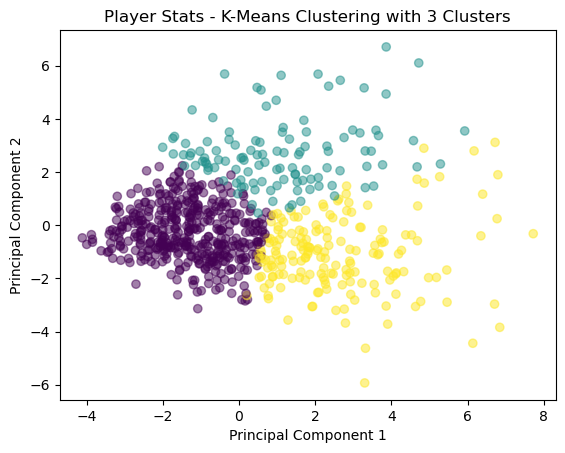

In [343]:
# Player Stats - KMeans Plot
optimal_k = 3 # observed in previous plots
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans_labels = final_kmeans.fit_predict(X_numeric_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f'Player Stats - K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("../mysite/KMeans-Stats.png")
plt.show()

/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

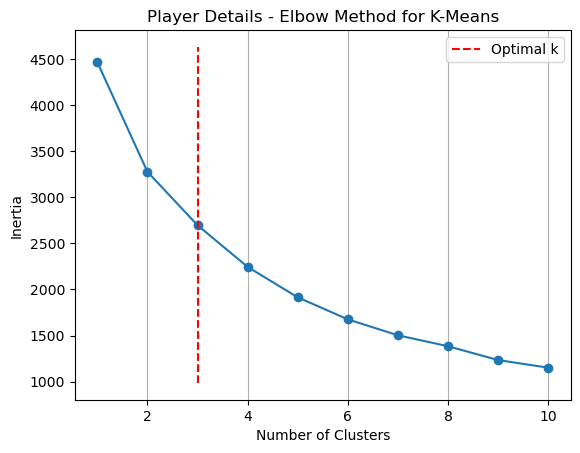

In [344]:
# Player Details - Elbow Method
X_numeric2 = df2.select_dtypes(include=['int64', 'float64']).dropna()

scaler2 = StandardScaler()
X_numeric_scaled2 = scaler2.fit_transform(X_numeric2)

inertia2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, random_state=42)
    kmeans2.fit(X_numeric_scaled2)
    inertia2.append(kmeans2.inertia_)

plt.plot(range(1, 11), inertia2, marker='o')
plt.title('Player Details - Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(axis="x")
knee_locator2 = KneeLocator(range(1, 11), inertia2, curve="convex", direction="decreasing")
optimal_k2 = knee_locator.elbow
plt.vlines(optimal_k2, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Optimal k')
plt.legend()
plt.savefig("../mysite/Elbow-Details.png")
plt.show()

/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


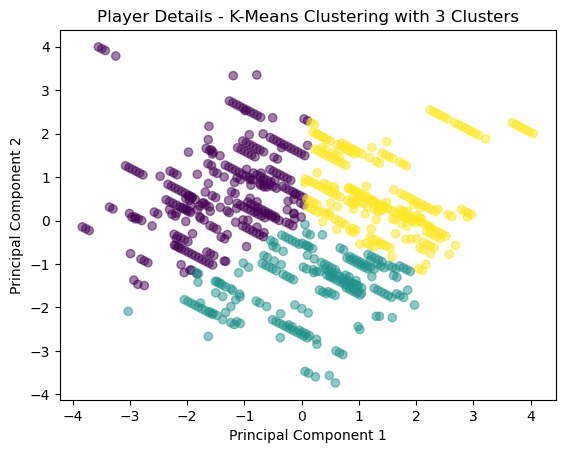

In [345]:
# Player Details - KMeans Plot
optimal_k2 =3 # observed in previous plot

final_kmeans2 = KMeans(n_clusters=optimal_k2, random_state=42)
final_kmeans_labels2 = final_kmeans2.fit_predict(X_numeric_scaled2)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_numeric_scaled2)

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=final_kmeans_labels2, cmap='viridis', alpha=0.5)
plt.title(f'Player Details - K-Means Clustering with {optimal_k2} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("../mysite/KMeans-Details.png")
plt.show()

In [346]:
# Player Stats - checking for optimal parameters for Euclidean
top_silhouette_scores = []

for eps in [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]:
    for sample in [3, 4, 5, 6, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=sample, metric='euclidean')
        dbscan_labels = dbscan.fit_predict(X_numeric_scaled)
        num_labels = len(np.unique(dbscan_labels))
        
        if num_labels > 3:
            silhouette = silhouette_score(X_numeric_scaled, dbscan_labels, metric='euclidean')
            top_silhouette_scores.append((eps, sample, num_labels-1, silhouette))

top_silhouette_scores.sort(key=lambda x: abs(x[3]), reverse=True)

for i in range(min(3, len(top_silhouette_scores))):
    params = top_silhouette_scores[i][:3]
    score = top_silhouette_scores[i][3]
    print(f"Top {i + 1}: eps = {params[0]}, min_samples = {params[1]}, Clusters = {params[2]}, Silhouette Score = {score}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [347]:
# Player Stats - checking for optimal parameters for Manhattan
top_silhouette_scores = []

for eps in [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]:
    for sample in [3, 4, 5, 6, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=sample, metric='manhattan')
        dbscan_labels = dbscan.fit_predict(X_numeric_scaled)
        num_labels = len(np.unique(dbscan_labels))
        
        if num_labels > 3:
            silhouette = silhouette_score(X_numeric_scaled, dbscan_labels, metric='manhattan')
            top_silhouette_scores.append((eps, sample, num_labels-1, silhouette))

top_silhouette_scores.sort(key=lambda x: abs(x[3]), reverse=True)

for i in range(min(3, len(top_silhouette_scores))):
    params = top_silhouette_scores[i][:3]
    score = top_silhouette_scores[i][3]
    print(f"Top {i + 1}: eps = {params[0]}, min_samples = {params[1]}, Clusters = {params[2]}, Silhouette Score = {score}")

Top 1: eps = 2.0, min_samples = 3, Clusters = 5, Silhouette Score = -0.32155719171535
Top 2: eps = 1.5, min_samples = 3, Clusters = 3, Silhouette Score = -0.20589563005861
Top 3: eps = 1.4, min_samples = 3, Clusters = 3, Silhouette Score = -0.20210723420207652


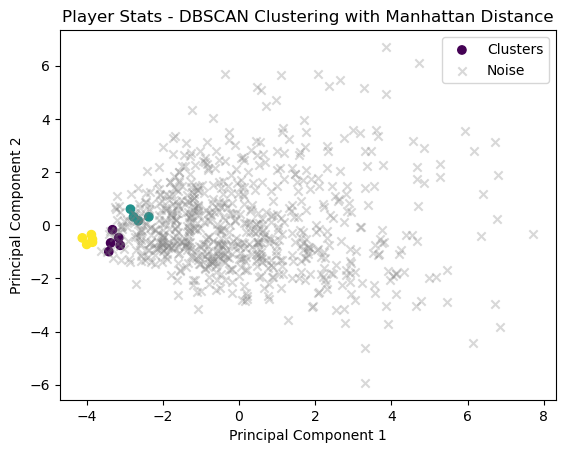

In [357]:
def visualize_dbscan_clusters(labels, title):
    unique_labels = np.unique(labels)
    
    if -1 in unique_labels:
        plt.scatter(X_pca[labels != -1, 0], X_pca[labels != -1, 1],
                    c=labels[labels != -1], cmap='viridis', label='Clusters')
        plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1],
                    c='grey', marker='x',  alpha=0.3, label='Noise')
    else:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.2)

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.savefig("../mysite/DBSCAN-Stats.png")
    plt.show()

final_dbscan = DBSCAN(eps=1.5, min_samples=3, metric='manhattan') # provided highest silhouette score
final_dbscan_labels = final_dbscan.fit_predict(X_numeric_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric_scaled)

visualize_dbscan_clusters(final_dbscan_labels, f'Player Stats - DBSCAN Clustering with Manhattan Distance')


In [360]:
# Player Details - checking for optimal parameters for Euclidean
top_silhouette_scores2 = []

for eps2 in [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]:
    for sample2 in [3, 4, 5, 6, 7]:
        dbscan2 = DBSCAN(eps=eps2, min_samples=sample2, metric='euclidean')
        dbscan_labels2 = dbscan2.fit_predict(X_numeric_scaled2)
        num_labels2 = len(np.unique(dbscan_labels2))
        
        if num_labels2 > 3:
            silhouette2 = silhouette_score(X_numeric_scaled2, dbscan_labels2, metric='euclidean')
            top_silhouette_scores2.append((eps2, sample2, num_labels2-1, silhouette2))

top_silhouette_scores2.sort(key=lambda x: abs(x[3]), reverse=True)

for i in range(min(3, len(top_silhouette_scores2))):
    params2 = top_silhouette_scores2[i][:3]
    score2 = top_silhouette_scores2[i][3]
    print(f"Top {i + 1}: eps = {params2[0]}, min_samples = {params2[1]}, Clusters = {params2[2]}, Silhouette Score = {score2}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [361]:
# Player Details - checking for optimal parameters for Manhattan
top_silhouette_scores2 = []

for eps2 in [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]:
    for sample2 in [3, 4, 5, 6, 7]:
        dbscan2 = DBSCAN(eps=eps2, min_samples=sample2, metric='manhattan')
        dbscan_labels2 = dbscan2.fit_predict(X_numeric_scaled2)
        num_labels2 = len(np.unique(dbscan_labels2))
        
        if num_labels2 > 3:
            silhouette2 = silhouette_score(X_numeric_scaled2, dbscan_labels2, metric='manhattan')
            top_silhouette_scores2.append((eps2, sample2, num_labels2-1, silhouette2))

top_silhouette_scores2.sort(key=lambda x: abs(x[3]), reverse=True)

for i in range(min(3, len(top_silhouette_scores2))):
    params2 = top_silhouette_scores2[i][:3]
    score2 = top_silhouette_scores2[i][3]
    print(f"Top {i + 1}: eps = {params2[0]}, min_samples = {params2[1]}, Clusters = {params2[2]}, Silhouette Score = {score2}")

Top 1: eps = 1.0, min_samples = 3, Clusters = 58, Silhouette Score = 0.23563211563710365
Top 2: eps = 1.4, min_samples = 5, Clusters = 15, Silhouette Score = -0.19543179155483958
Top 3: eps = 1.4, min_samples = 7, Clusters = 12, Silhouette Score = -0.17836814193014455


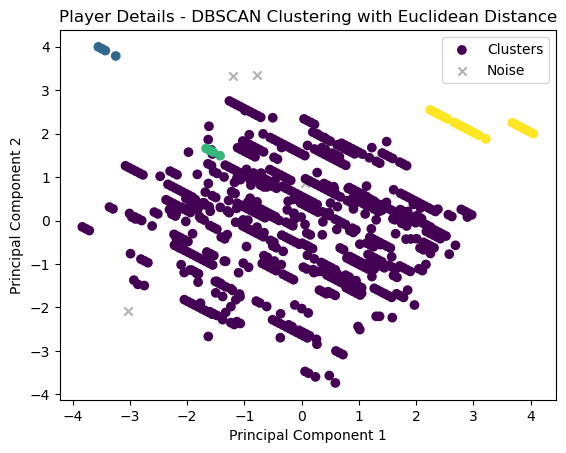

In [351]:
def visualize_dbscan_clusters2(labels, title):
    unique_labels2 = np.unique(labels)
    
    if -1 in unique_labels2:
        plt.scatter(X_pca2[labels != -1, 0], X_pca2[labels != -1, 1],
                    c=labels[labels != -1], cmap='viridis', label='Clusters')
        plt.scatter(X_pca2[labels == -1, 0], X_pca2[labels == -1, 1],
                    c='black', marker='x',  alpha=0.3, label='Noise')
    else:
        plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels, cmap='viridis', alpha=0.5)

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.savefig("../mysite/DBSCAN-Details.png")
    plt.show()


final_dbscan2 = DBSCAN(eps=1.8, min_samples=3, metric='euclidean')
final_dbscan_labels2 = final_dbscan2.fit_predict(X_numeric_scaled2)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_numeric_scaled2)

visualize_dbscan_clusters2(final_dbscan_labels2, f'Player Details - DBSCAN Clustering with Euclidean Distance')


In [352]:
# Player Stats - Hierarchical Clustering
linkage_methods = ['complete', 'average', 'ward']
for linkage_method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage_method)
    hierarchical_labels = hierarchical.fit_predict(X_numeric_scaled)
    silhouette = silhouette_score(X_numeric_scaled, hierarchical_labels)
    print(f"Silhouette Score for Hierarchical Clustering with {linkage_method} linkage: {silhouette}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score for Hierarchical Clustering with complete linkage: 0.23245175549741554
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score for Hierarchical Clustering with average linkage: 0.3865091768419238
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score for Hierarchical Clustering with ward linkage: 0.1937665369

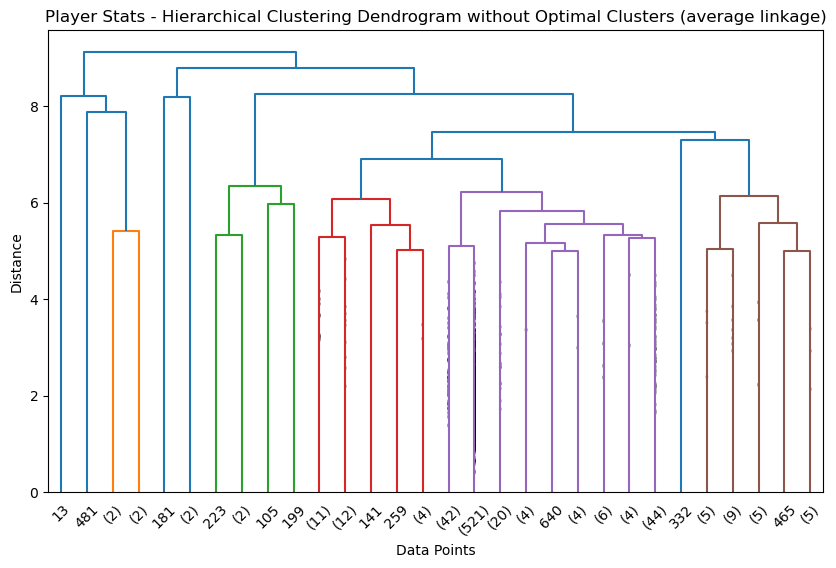

In [364]:
optimal_linkage = 'average' # provided highest silhouette score 

final_hierarchical = AgglomerativeClustering(n_clusters=3, linkage=optimal_linkage)
final_hierarchical_labels = final_hierarchical.fit_predict(X_numeric_scaled)
linkage_matrix_final = linkage(X_numeric_scaled, method=optimal_linkage)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_final, truncate_mode='lastp', show_contracted=True)
plt.title(f'Player Stats - Hierarchical Clustering Dendrogram without Optimal Clusters ({optimal_linkage} linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.savefig("../mysite/HC-Stats-NoP.png")
plt.show()

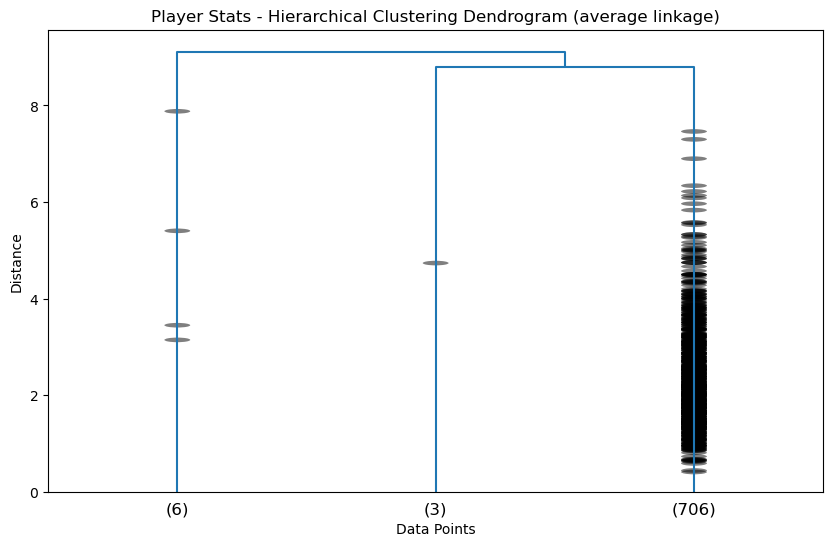

In [365]:
# Player Stats - Final Dendrogram
optimal_linkage = 'average' # provided highest silhouette score 

final_hierarchical = AgglomerativeClustering(n_clusters=3, linkage=optimal_linkage)
final_hierarchical_labels = final_hierarchical.fit_predict(X_numeric_scaled)
linkage_matrix_final = linkage(X_numeric_scaled, method=optimal_linkage)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_final, truncate_mode='lastp', p=optimal_k, show_contracted=True)
plt.title(f'Player Stats - Hierarchical Clustering Dendrogram ({optimal_linkage} linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.savefig("../mysite/HC-Stats.png")
plt.show()

In [368]:
# Player Details - Hierarchical Clustering
linkage_methods2 = ['complete', 'average', 'ward']
for linkage_method2 in linkage_methods2:
    hierarchical2 = AgglomerativeClustering(n_clusters=optimal_k2, linkage=linkage_method2)
    hierarchical_labels2 = hierarchical2.fit_predict(X_numeric_scaled2)
    silhouette2 = silhouette_score(X_numeric_scaled2, hierarchical_labels2)
    print(f"Silhouette Score for Hierarchical Clustering with {linkage_method2} linkage: {silhouette2}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score for Hierarchical Clustering with complete linkage: 0.23097659532485074
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score for Hierarchical Clustering with average linkage: 0.4565407271902525
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score for Hierarchical Clustering with ward linkage: 0.2114696293

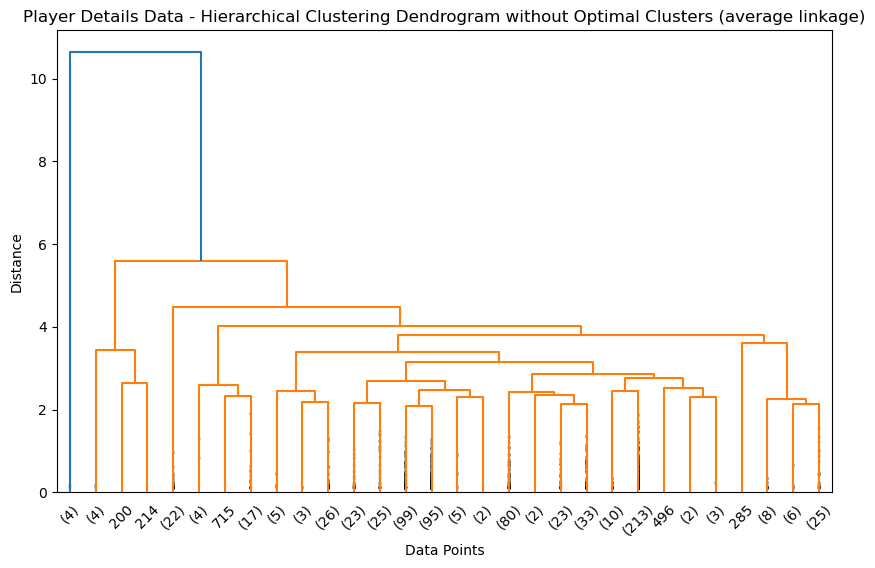

In [366]:
optimal_linkage2 = 'average' # provided highest silhouette score

final_linkage_matrix2 = linkage(X_numeric_scaled2, method=optimal_linkage2)

plt.figure(figsize=(10, 6))
dendrogram(final_linkage_matrix2, truncate_mode='lastp', show_contracted=True)
plt.title(f'Player Details Data - Hierarchical Clustering Dendrogram without Optimal Clusters ({optimal_linkage2} linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.savefig("../mysite/HC-Details-NoP.png")
plt.show()

final_hierarchical2 = AgglomerativeClustering(n_clusters=3, linkage=optimal_linkage2)
final_hierarchical_labels2 = final_hierarchical2.fit_predict(X_numeric_scaled2)


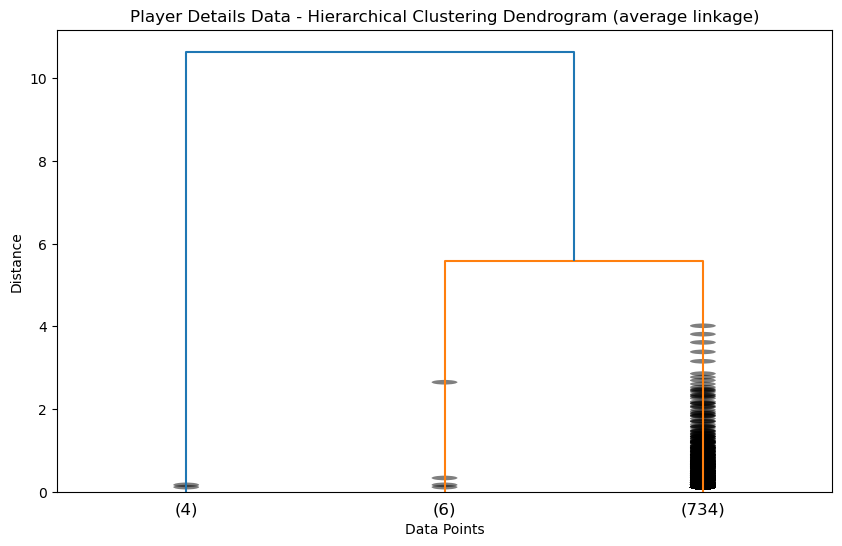

In [355]:
# Player Details - Dendrogram
optimal_linkage2 = 'average' # provided highest silhouette score

final_linkage_matrix2 = linkage(X_numeric_scaled2, method=optimal_linkage2)

plt.figure(figsize=(10, 6))
dendrogram(final_linkage_matrix2, truncate_mode='lastp', p=optimal_k2, show_contracted=True)
plt.title(f'Player Details Data - Hierarchical Clustering Dendrogram ({optimal_linkage2} linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.savefig("../mysite/HC-Details.png")
plt.show()

final_hierarchical2 = AgglomerativeClustering(n_clusters=3, linkage=optimal_linkage2)
final_hierarchical_labels2 = final_hierarchical2.fit_predict(X_numeric_scaled2)
